In [41]:
tf.debugging.set_log_device_placement(True)

In [2]:
# !nvcc --version
!nvidia-smi

Thu Apr 21 15:22:42 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.103.01   Driver Version: 470.103.01   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:19:00.0 Off |                  N/A |
| 37%   45C    P8    27W / 350W |  23388MiB / 24268MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 97%   

In [3]:
# import tensorflow as tf
# tf.config.list_physical_devices('GPU')

In [4]:
#  print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

In [5]:
# tf.debugging.set_log_device_placement(True)

In [6]:
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#     raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

## Mount Google Drive


In [7]:
# from google.colab import drive
# drive.mount('drive')

In [8]:
# cd drive/My\ Drive/Colab\ Notebooks/voice_phishing/DL

In [14]:
# ls -l

# Import Libraries

In [15]:
import numpy
from keras.preprocessing.text import Tokenizer
# from keras.utils import to_categorical
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense,GRU
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from keras.layers import Embedding
from keras.preprocessing.sequence import pad_sequences
from time import sleep
import string
from textblob import TextBlob
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import nltk
import re
from keras.callbacks import ModelCheckpoint
from keras.callbacks import EarlyStopping
earlystopping = EarlyStopping(monitor = 'loss', verbose = 1,patience = 8, mode = 'min')
from glob import glob
import numpy as np
from tqdm import tqdm
# from keras.utils import to_categorical
# from sklearn.feature_extraction.stop_words import ENGLISH_STOP_WORDS
# from sklearn.feature_extraction import _stop_words
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from keras.layers import Bidirectional, GlobalMaxPool1D
from sklearn.preprocessing import StandardScaler, RobustScaler
import os, re, csv, math, codecs
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from keras.models import Sequential

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import math

import tensorflow as tf

# Load the NPZ file and prepare it

In [16]:
npsavezFile=np.load("OLD_outfile-new.npz",allow_pickle=True)
#print(npsavezFile.files)
vocab=npsavezFile['arr_1']
data=npsavezFile['arr_0']
Y=npsavezFile['arr_2']
Y=list(Y)


max_length=max([len(i) for i in data])
#print("max_length",max_length) # max_length 35

print(sorted([len(i) for i in data]))



word_id=dict((c,i) for i,c in enumerate(vocab))
id_word=dict((i,c) for i,c in enumerate(vocab))
#print("word_id",word_id)
#print("id_word",id_word)


X_train=[]
for sentence in data:
	x=[]
	for word in sentence:
		app=word_id[word]
		x.append(app)
		
	X_train.append(x)


[5, 5, 6, 6, 6, 7, 7, 8, 8, 9, 10, 10, 11, 11, 11, 12, 13, 14, 14, 15, 15, 15, 15, 15, 16, 17, 18, 18, 19, 19, 19, 20, 20, 21, 21, 21, 21, 21, 21, 21, 22, 22, 23, 23, 23, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 25, 25, 25, 26, 26, 26, 26, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 34, 3

In [17]:
max_length=max([len(i) for i in X_train])


encoded = pad_sequences(X_train, maxlen=max_length, padding='pre')
encoded=np.array(encoded)
print("encoded shape",encoded.shape) #encoded shape 
#encoded=np.true_divide(encoded, 500)
standard_scaler = StandardScaler()
#robust_scaler = RobustScaler()
#encoded = standard_scaler.fit_transform(encoded)

length_encoded=len(encoded)
# encoded shape (1218, 4855)

encoded shape (1218, 4855)


# FastText embeddings

In [18]:
print('loading word embeddings...')
embeddings_index = {}
f = codecs.open('wiki.ko.vec', encoding='utf-8')
for line in tqdm(f):
    values = line.rstrip().rsplit(' ')
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
MAX_NB_WORDS=len(vocab)
print('found %s word vectors' % len(embeddings_index))
print("tokenizing input data...")
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, lower=True, char_level=False)
tokenizer.fit_on_texts(data)  #leaky
word_seq_train = tokenizer.texts_to_sequences(data)
word_seq_test = tokenizer.texts_to_sequences(data)
word_index = tokenizer.word_index
print("dictionary size: ", len(word_index))
embed_dim = 300 

loading word embeddings...


879131it [00:56, 15499.41it/s]


found 879130 word vectors
tokenizing input data...
dictionary size:  10024


In [19]:
#embedding matrix
print('preparing embedding matrix...')
words_not_found = []
nb_words = min(MAX_NB_WORDS, len(word_index))
embedding_matrix = np.zeros((MAX_NB_WORDS, embed_dim))
for word, i in word_index.items():
    if i >= nb_words:
        continue
    embedding_vector = embeddings_index.get(word)
    if (embedding_vector is not None) and len(embedding_vector) > 0:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector
    else:
        words_not_found.append(word)
print('number of null word embeddings: %d' % np.sum(np.sum(embedding_matrix, axis=1) == 0))
print("sample words not found: ", np.random.choice(words_not_found, 10))

#number of null word embeddings: 4027

preparing embedding matrix...
number of null word embeddings: 4027
sample words not found:  ['그렇다면은' '프리스톤' '앞두' '올렸' '놨었' '김인술' '멈췄' '어제께' '기다렸' '홀씨']


# Split dataset

In [20]:
Y_train=np.array(Y)
# Split the data
trainX_data, testX_data, Y_TRAIN, Y_TEST = train_test_split(encoded, Y_train, test_size=0.30, shuffle= True)
Ytrain=to_categorical(Y_TRAIN,num_classes=2)
Ytest=to_categorical(Y_TEST,num_classes=2)

In [21]:
print('Train set size = {} \nTest set size = {}'.format(len(trainX_data),len(testX_data)))

Train set size = 852 
Test set size = 366


In [29]:
print(len(trainX_data))
print(len(testX_data))

852
366


# Build model

In [30]:
from keras.callbacks import CSVLogger
csv_logger = CSVLogger('training_GRU.log', separator=',', append=False)

model = Sequential()
model.add(Embedding(MAX_NB_WORDS, embed_dim,weights=[embedding_matrix], input_length=max_length, trainable=False))
#model.add(Embedding(len(vocab), 10, input_length=max_length))
#model.add(LSTM(128,input_shape=(encoded.shape[0],encoded.shape[1]),return_sequences=True))
model.add(GRU(100,return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(100,return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(50,return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(50,return_sequences=True))
model.add(Dropout(0.25))
model.add(GRU(50))
model.add(Dropout(0.20))
model.add(Dense(2, activation='softmax'))


for i,layer in enumerate(model.layers):
 print("i",str(layer)+str(i))

2022-04-21 15:28:42.960367: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-04-21 15:28:46.672885: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 237 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:19:00.0, compute capability: 8.6
2022-04-21 15:28:46.673895: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 16221 MB memory:  -> device: 1, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:1a:00.0, compute capability: 8.6
2022-04-21 15:28:46.674771: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1525] Created device /job:localhost/replica:0/t

i <keras.layers.embeddings.Embedding object at 0x7efc11832980>0
i <keras.layers.recurrent_v2.GRU object at 0x7efc11830ca0>1
i <keras.layers.core.dropout.Dropout object at 0x7efbfdcf88e0>2
i <keras.layers.recurrent_v2.GRU object at 0x7efbfdcf8730>3
i <keras.layers.core.dropout.Dropout object at 0x7efbec3e4f10>4
i <keras.layers.recurrent_v2.GRU object at 0x7efbec2108e0>5
i <keras.layers.core.dropout.Dropout object at 0x7efbec3e5180>6
i <keras.layers.recurrent_v2.GRU object at 0x7efbec28d900>7
i <keras.layers.core.dropout.Dropout object at 0x7efbec2accd0>8
i <keras.layers.recurrent_v2.GRU object at 0x7efbec178400>9
i <keras.layers.core.dropout.Dropout object at 0x7efbec259a50>10
i <keras.layers.core.dense.Dense object at 0x7efbec2e66e0>11


In [31]:
# for i,layer in enumerate(model.layers):
#  print("i",str(layer)+str(i))

In [32]:
print(model.summary())
# Total params: 3,930,402
# Trainable params: 234,702
# Non-trainable params: 3,695,700

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4855, 300)         3695700   
                                                                 
 gru (GRU)                   (None, 4855, 100)         120600    
                                                                 
 dropout (Dropout)           (None, 4855, 100)         0         
                                                                 
 gru_1 (GRU)                 (None, 4855, 100)         60600     
                                                                 
 dropout_1 (Dropout)         (None, 4855, 100)         0         
                                                                 
 gru_2 (GRU)                 (None, 4855, 50)          22800     
                                                                 
 dropout_2 (Dropout)         (None, 4855, 50)          0

In [33]:
tf.keras.utils.plot_model(model, 
                          # to_file="GRU_architecture_0.png",
                          show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model/model_to_dot to work.


In [34]:
# tf.keras.utils.plot_model(
#     model,
#     to_file="GRU_architecture_1.png",
#     show_shapes=False,
#     # show_dtype=False,
#     show_layer_names=True,
#     rankdir="TB",
#     expand_nested=False,
#     dpi=96,
# )

In [35]:
# compile network
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy', 
                      #  tf.keras.metrics.AUC(), 
                       tf.keras.metrics.Precision(), 
                       tf.keras.metrics.Recall()
                       ]
              )

# train the model

In [43]:
%%time
from time import time
from timeit import default_timer as timer

# fit network
checkpoint = ModelCheckpoint("check_GRU.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')
callbacks_list = [checkpoint,earlystopping,csv_logger] #

try:
    # Specify an invalid GPU device
    with tf.device('/device:GPU:1'):
        start_time = time()
        history = model.fit(
            trainX_data, 
            Ytrain,
            batch_size=32, 
            epochs=10, 
            verbose=1,
            callbacks=callbacks_list,
            validation_data=(testX_data,Ytest)
        )
        run_time = time() - start_time
except RuntimeError as e:
    print(e)

Epoch 1/10


2022-04-21 15:36:26.801479: I tensorflow/stream_executor/cuda/cuda_dnn.cc:368] Loaded cuDNN version 8200
2022-04-21 15:36:28.572835: I tensorflow/stream_executor/cuda/cuda_blas.cc:1786] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.


27/27 [==============================] - ETA: 0s - loss: 0.5225 - accuracy: 0.7347 - precision: 0.7347 - recall: 0.7347
Epoch 1: loss improved from inf to 0.52248, saving model to check_GRU.h5
27/27 [==============================] - 45s 2s/step - loss: 0.5225 - accuracy: 0.7347 - precision: 0.7347 - recall: 0.7347 - val_loss: 0.3258 - val_accuracy: 0.8579 - val_precision: 0.8579 - val_recall: 0.8579
Epoch 2/10
27/27 [==============================] - ETA: 0s - loss: 0.2559 - accuracy: 0.9014 - precision: 0.9014 - recall: 0.9014
Epoch 2: loss improved from 0.52248 to 0.25586, saving model to check_GRU.h5
27/27 [==============================] - 41s 2s/step - loss: 0.2559 - accuracy: 0.9014 - precision: 0.9014 - recall: 0.9014 - val_loss: 0.3848 - val_accuracy: 0.8716 - val_precision: 0.8716 - val_recall: 0.8716
Epoch 3/10
27/27 [==============================] - ETA: 0s - loss: 0.2311 - accuracy: 0.9120 - precision: 0.9120 - recall: 0.9120
Epoch 3: loss improved from 0.25586 to 0.23107

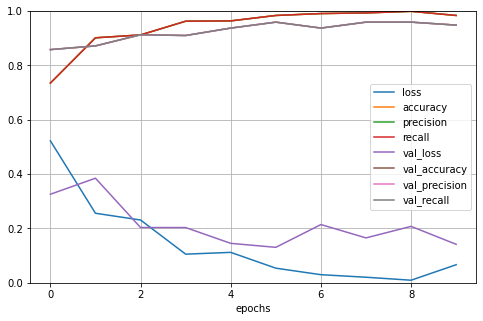

In [44]:
# Wall time: 4min 20s
# loss: 0.0171 - accuracy: 0.9918 - precision: 0.9918 - recall: 0.9918 - val_loss: 0.2304 - val_accuracy: 0.9536 - val_precision: 0.9536 - val_recall: 0.9536

# graph of the training
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.legend()
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.xlabel('epochs')
plt.show()
# plt.savefig('GRU_archi_plot_allMetrics.png')

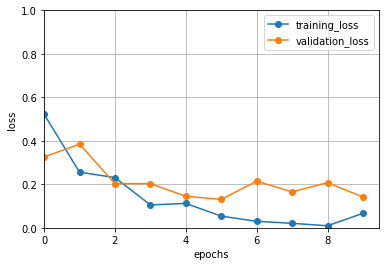

In [45]:
import pandas as pd
import matplotlib.pyplot as plt

# graph of the training
plt.plot(history.epoch, history.history['loss'], '-o', label='training_loss')
plt.plot(history.epoch, history.history['val_loss'], '-o', label='validation_loss')
plt.legend()
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.grid(True)
plt.xlim(left=0)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show()
# plt.savefig('GRU_archi_plot_looss.png')

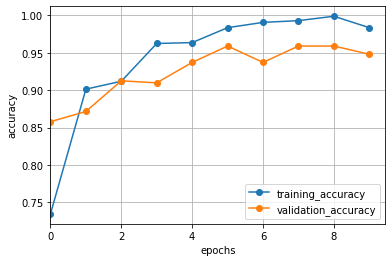

In [46]:
# graph of the training
plt.plot(history.epoch, history.history['accuracy'], '-o', label='training_accuracy')
plt.plot(history.epoch, history.history['val_accuracy'], '-o', label='validation_accuracy')
plt.grid(True)
plt.legend()
plt.xlim(left=0)
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()
# plt.savefig('GRU_archi_plot_acc.png')

In [47]:
model.save("GRU_10EP.h5")

# test du model

In [48]:
test_loss, test_acc = model.evaluate(testX_data)

print('Test Loss: {}'.format(test_loss))
print('Test Accuracy: {}'.format(test_acc))

12/12 [==============================] - 1s 1ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00 - precision: 0.0000e+00 - recall: 0.0000e+00


ValueError: too many values to unpack (expected 2)

In [50]:
print("\n")
#######################for testing####################

yhat_probs = model.predict(testX_data, verbose=1)
# predict crisp classes for test set
yhat_classes = model.predict_classes(testX_data, verbose=1)


# reduce to 1d array
#yhat_probs = yhat_probs[:, 0]
#yhat_classes = yhat_classes[:, 0]

2022-04-21 15:55:39.810500: W tensorflow/core/common_runtime/bfc_allocator.cc:462] Allocator (GPU_0_bfc) ran out of memory trying to allocate 177.79MiB (rounded to 186432000)requested by op transpose
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2022-04-21 15:55:39.810572: I tensorflow/core/common_runtime/bfc_allocator.cc:1010] BFCAllocator dump for GPU_0_bfc
2022-04-21 15:55:39.810598: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (256): 	Total Chunks: 89, Chunks in use: 88. 22.2KiB allocated for chunks. 22.0KiB in use in bin. 396B client-requested in use in bin.
2022-04-21 15:55:39.810615: I tensorflow/core/common_runtime/bfc_allocator.cc:1017] Bin (512): 	Total Chunks: 3, Chunks in use: 3. 1.5KiB allocated for chunks. 1.5KiB in use in bin. 1.2KiB client-requested in use in bin.
2022-04-21 15:55:39.810629: I tens

ResourceExhaustedError: Graph execution error:

OOM when allocating tensor with shape[4855,32,300] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node transpose}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.

	 [[sequential/gru/PartitionedCall]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_predict_function_23699]

# Metrics

In [49]:
# accuracy: (tp + tn) / (p + n)
accuracy = accuracy_score(Y_TEST, yhat_classes)
print('Testing Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(Y_TEST, yhat_classes,average='weighted')
print('Testing Precision: %f' % precision)
# recall: tp / (tp + fn)
recall = recall_score(Y_TEST, yhat_classes,average='weighted')
print('Testing Recall: %f' % recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(Y_TEST, yhat_classes,average='weighted')
print('Testing F1 score: %f' % f1)

# Testing Accuracy: 0.953552
# Testing Precision: 0.955182
# Testing Recall: 0.953552
# Testing F1 score: 0.953502

NameError: name 'yhat_classes' is not defined

In [ ]:
# Setting up our results dataframe
df_results = pd.DataFrame(columns=['F1_score', 'Precision', 'Recall', 'Accuracy', 'Accuracy1', 'Training time'])

# append the results
df_results.loc['GRU'] = [f1, precision, recall, accuracy, accuracy, run_time]
df_results

# 0.953502	0.955182	0.953552	0.953552	0.953552	260.102183

## Save performances result to SVC file


In [ ]:
# save the training results
df_results.to_csv('performances_GRU_algorithm.csv')